In [16]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

### Generating the Dataset

In [17]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [18]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [19]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([1.0855982  0.24455406], shape=(2,), dtype=float32) 
label: tf.Tensor([5.5538096], shape=(1,), dtype=float32)


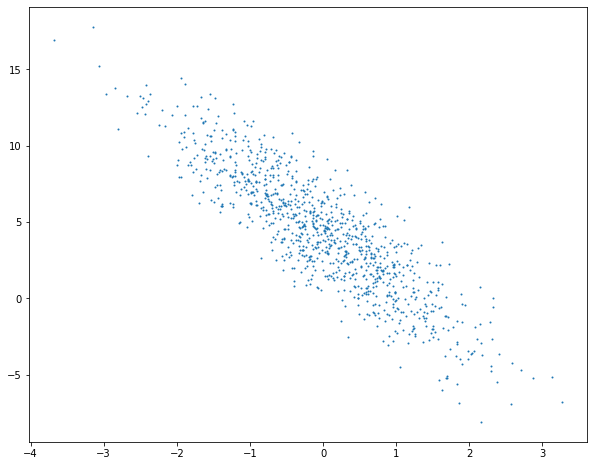

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

### Reading the Dataset

In [21]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a TensorFlow data iterator."""
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [22]:
next(iter(data_iter))

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[-0.3067374 , -0.97998697],
        [ 0.6019807 ,  1.2322233 ],
        [-0.70043784, -0.9855411 ],
        [ 1.017782  ,  0.8365997 ],
        [-0.7720149 ,  0.5866668 ],
        [ 0.3427563 ,  0.9989649 ],
        [-0.2528654 , -1.6184753 ],
        [-0.17047195,  0.3011803 ],
        [ 0.27920496, -0.62340826],
        [ 0.2487463 ,  1.485001  ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 6.9292474 ],
        [ 1.2263831 ],
        [ 6.1568556 ],
        [ 3.3882716 ],
        [ 0.6499356 ],
        [ 1.4800965 ],
        [ 9.196142  ],
        [ 2.8314793 ],
        [ 6.88215   ],
        [-0.36457583]], dtype=float32)>)

### Defining the Model

In [23]:
# initializer = tf.initializers.RandomNormal(stddev=0.01)
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(1))

In [24]:
model.input_shape

(None, 2)

In [25]:
model.output_shape

(None, 1)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Defining the Loss Function

In [27]:
loss = tf.keras.losses.MeanSquaredError()

### Defining the Optimization Algorithm

In [28]:
trainer = tf.keras.optimizers.SGD(learning_rate=0.03)

### Training

In [29]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            l = loss(model(X, training=True), y)
        grads = tape.gradient(l, model.trainable_variables)
        trainer.apply_gradients(zip(grads, model.trainable_variables))
    l = loss(model(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000200
epoch 2, loss 0.000101
epoch 3, loss 0.000101


In [30]:
w = model.get_weights()[0]
print('error in estimating w', true_w - tf.reshape(w, true_w.shape))
b = model.get_weights()[1]
print('error in estimating b', true_b - b)

error in estimating w tf.Tensor([-0.00017595  0.0007236 ], shape=(2,), dtype=float32)
error in estimating b [-0.00038719]
